In [1]:
import os
import shutil
import random
import keras
import tensorflow

In [2]:
classes_number = 4

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Photo directory paths
train_path = 'data/Farm_Dataset/train'
valid_path = 'data/Farm_Dataset/valid'
test_path = 'data/Farm_Dataset/test'

# MobileNet expect 224 by 224 images.
# Process train, valid, and test batches.
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [4]:
mobile = tf.keras.applications.MobileNetV3Large()

22661472/22661472 [==============================] - 8s 0us/step


In [5]:
mobile.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, None, None, 16)       432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, None, None, 16)       64        ['Conv[0][0]']                
 lization)                                                                         

 expanded_conv_2/depthwise   (None, None, None, 72)       648       ['re_lu_4[0][0]']             
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_2/depthwise/  (None, None, None, 72)       288       ['expanded_conv_2/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_5 (ReLU)              (None, None, None, 72)       0         ['expanded_conv_2/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_

                                                                                                  
 re_lu_9 (ReLU)              (None, None, None, 120)      0         ['expanded_conv_4/expand/Batch
                                                                    Norm[0][0]']                  
                                                                                                  
 expanded_conv_4/depthwise   (None, None, None, 120)      3000      ['re_lu_9[0][0]']             
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_4/depthwise/  (None, None, None, 120)      480       ['expanded_conv_4/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
          

                                                                                                  
 tf.__operators__.add_3 (TF  (None, 1, 1, 120)            0         ['expanded_conv_5/squeeze_exci
 OpLambda)                                                          te/Conv_1[0][0]']             
                                                                                                  
 re_lu_14 (ReLU)             (None, 1, 1, 120)            0         ['tf.__operators__.add_3[0][0]
                                                                    ']                            
                                                                                                  
 tf.math.multiply_3 (TFOpLa  (None, 1, 1, 120)            0         ['re_lu_14[0][0]']            
 mbda)                                                                                            
                                                                                                  
 expanded_

                                                                                                  
 re_lu_17 (ReLU)             (None, None, None, 200)      0         ['tf.__operators__.add_6[0][0]
                                                                    ']                            
                                                                                                  
 tf.math.multiply_6 (TFOpLa  (None, None, None, 200)      0         ['re_lu_17[0][0]']            
 mbda)                                                                                            
                                                                                                  
 multiply_3 (Multiply)       (None, None, None, 200)      0         ['expanded_conv_7/expand/Batch
                                                                    Norm[0][0]',                  
                                                                     'tf.math.multiply_6[0][0]']  
          

 expanded_conv_8/project (C  (None, None, None, 80)       14720     ['multiply_6[0][0]']          
 onv2D)                                                                                           
                                                                                                  
 expanded_conv_8/project/Ba  (None, None, None, 80)       320       ['expanded_conv_8/project[0][0
 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
                                                                                                  
 expanded_conv_8/Add (Add)   (None, None, None, 80)       0         ['expanded_conv_7/Add[0][0]', 
                                                                     'expanded_conv_8/project/Batc
                                                                    hNorm[0][0]']                 
          

  (DepthwiseConv2D)                                                                               
                                                                                                  
 expanded_conv_10/depthwise  (None, None, None, 480)      1920      ['expanded_conv_10/depthwise[0
 /BatchNorm (BatchNormaliza                                         ][0]']                        
 tion)                                                                                            
                                                                                                  
 tf.__operators__.add_13 (T  (None, None, None, 480)      0         ['expanded_conv_10/depthwise/B
 FOpLambda)                                                         atchNorm[0][0]']              
                                                                                                  
 re_lu_24 (ReLU)             (None, None, None, 480)      0         ['tf.__operators__.add_13[0][0
          

                                                                                                  
 tf.math.multiply_16 (TFOpL  (None, None, None, 672)      0         ['re_lu_27[0][0]']            
 ambda)                                                                                           
                                                                                                  
 multiply_12 (Multiply)      (None, None, None, 672)      0         ['expanded_conv_11/depthwise/B
                                                                    atchNorm[0][0]',              
                                                                     'tf.math.multiply_16[0][0]'] 
                                                                                                  
 expanded_conv_11/squeeze_e  (None, 1, 1, 672)            0         ['multiply_12[0][0]']         
 xcite/AvgPool (GlobalAvera                                                                       
 gePooling

                                                                                                  
 multiply_14 (Multiply)      (None, None, None, 672)      0         ['expanded_conv_12/depthwise/B
                                                                    atchNorm[0][0]',              
                                                                     'tf.math.multiply_19[0][0]'] 
                                                                                                  
 expanded_conv_12/squeeze_e  (None, 1, 1, 672)            0         ['multiply_14[0][0]']         
 xcite/AvgPool (GlobalAvera                                                                       
 gePooling2D)                                                                                     
                                                                                                  
 expanded_conv_12/squeeze_e  (None, 1, 1, 168)            113064    ['expanded_conv_12/squeeze_exc
 xcite/Con

                                                                                                  
 expanded_conv_13/squeeze_e  (None, 1, 1, 240)            0         ['expanded_conv_13/squeeze_exc
 xcite/Relu (ReLU)                                                  ite/Conv[0][0]']              
                                                                                                  
 expanded_conv_13/squeeze_e  (None, 1, 1, 960)            231360    ['expanded_conv_13/squeeze_exc
 xcite/Conv_1 (Conv2D)                                              ite/Relu[0][0]']              
                                                                                                  
 tf.__operators__.add_23 (T  (None, 1, 1, 960)            0         ['expanded_conv_13/squeeze_exc
 FOpLambda)                                                         ite/Conv_1[0][0]']            
                                                                                                  
 re_lu_34 

                                                                                                  
 tf.__operators__.add_26 (T  (None, 1, 1, 960)            0         ['expanded_conv_14/squeeze_exc
 FOpLambda)                                                         ite/Conv_1[0][0]']            
                                                                                                  
 re_lu_37 (ReLU)             (None, 1, 1, 960)            0         ['tf.__operators__.add_26[0][0
                                                                    ]']                           
                                                                                                  
 tf.math.multiply_26 (TFOpL  (None, 1, 1, 960)            0         ['re_lu_37[0][0]']            
 ambda)                                                                                           
                                                                                                  
 expanded_

In [6]:
from keras.layers import Activation, Dense 
from tensorflow.keras import Model
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects

# Set the final layer to output classes
x = mobile.layers[-2].output
output = Dense(units=classes_number, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, None, None, 16)       432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, None, None, 16)       64        ['Conv[0][0]']                
 lization)                                                                                    

 expanded_conv_2/depthwise   (None, None, None, 72)       648       ['re_lu_4[0][0]']             
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_2/depthwise/  (None, None, None, 72)       288       ['expanded_conv_2/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_5 (ReLU)              (None, None, None, 72)       0         ['expanded_conv_2/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_

                                                                                                  
 re_lu_9 (ReLU)              (None, None, None, 120)      0         ['expanded_conv_4/expand/Batch
                                                                    Norm[0][0]']                  
                                                                                                  
 expanded_conv_4/depthwise   (None, None, None, 120)      3000      ['re_lu_9[0][0]']             
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_4/depthwise/  (None, None, None, 120)      480       ['expanded_conv_4/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
          

                                                                                                  
 tf.__operators__.add_3 (TF  (None, 1, 1, 120)            0         ['expanded_conv_5/squeeze_exci
 OpLambda)                                                          te/Conv_1[0][0]']             
                                                                                                  
 re_lu_14 (ReLU)             (None, 1, 1, 120)            0         ['tf.__operators__.add_3[0][0]
                                                                    ']                            
                                                                                                  
 tf.math.multiply_3 (TFOpLa  (None, 1, 1, 120)            0         ['re_lu_14[0][0]']            
 mbda)                                                                                            
                                                                                                  
 expanded_

                                                                                                  
 re_lu_17 (ReLU)             (None, None, None, 200)      0         ['tf.__operators__.add_6[0][0]
                                                                    ']                            
                                                                                                  
 tf.math.multiply_6 (TFOpLa  (None, None, None, 200)      0         ['re_lu_17[0][0]']            
 mbda)                                                                                            
                                                                                                  
 multiply_3 (Multiply)       (None, None, None, 200)      0         ['expanded_conv_7/expand/Batch
                                                                    Norm[0][0]',                  
                                                                     'tf.math.multiply_6[0][0]']  
          

 expanded_conv_8/project (C  (None, None, None, 80)       14720     ['multiply_6[0][0]']          
 onv2D)                                                                                           
                                                                                                  
 expanded_conv_8/project/Ba  (None, None, None, 80)       320       ['expanded_conv_8/project[0][0
 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
                                                                                                  
 expanded_conv_8/Add (Add)   (None, None, None, 80)       0         ['expanded_conv_7/Add[0][0]', 
                                                                     'expanded_conv_8/project/Batc
                                                                    hNorm[0][0]']                 
          

  (DepthwiseConv2D)                                                                               
                                                                                                  
 expanded_conv_10/depthwise  (None, None, None, 480)      1920      ['expanded_conv_10/depthwise[0
 /BatchNorm (BatchNormaliza                                         ][0]']                        
 tion)                                                                                            
                                                                                                  
 tf.__operators__.add_13 (T  (None, None, None, 480)      0         ['expanded_conv_10/depthwise/B
 FOpLambda)                                                         atchNorm[0][0]']              
                                                                                                  
 re_lu_24 (ReLU)             (None, None, None, 480)      0         ['tf.__operators__.add_13[0][0
          

                                                                                                  
 tf.math.multiply_16 (TFOpL  (None, None, None, 672)      0         ['re_lu_27[0][0]']            
 ambda)                                                                                           
                                                                                                  
 multiply_12 (Multiply)      (None, None, None, 672)      0         ['expanded_conv_11/depthwise/B
                                                                    atchNorm[0][0]',              
                                                                     'tf.math.multiply_16[0][0]'] 
                                                                                                  
 expanded_conv_11/squeeze_e  (None, 1, 1, 672)            0         ['multiply_12[0][0]']         
 xcite/AvgPool (GlobalAvera                                                                       
 gePooling

                                                                                                  
 multiply_14 (Multiply)      (None, None, None, 672)      0         ['expanded_conv_12/depthwise/B
                                                                    atchNorm[0][0]',              
                                                                     'tf.math.multiply_19[0][0]'] 
                                                                                                  
 expanded_conv_12/squeeze_e  (None, 1, 1, 672)            0         ['multiply_14[0][0]']         
 xcite/AvgPool (GlobalAvera                                                                       
 gePooling2D)                                                                                     
                                                                                                  
 expanded_conv_12/squeeze_e  (None, 1, 1, 168)            113064    ['expanded_conv_12/squeeze_exc
 xcite/Con

                                                                                                  
 expanded_conv_13/squeeze_e  (None, 1, 1, 240)            0         ['expanded_conv_13/squeeze_exc
 xcite/Relu (ReLU)                                                  ite/Conv[0][0]']              
                                                                                                  
 expanded_conv_13/squeeze_e  (None, 1, 1, 960)            231360    ['expanded_conv_13/squeeze_exc
 xcite/Conv_1 (Conv2D)                                              ite/Relu[0][0]']              
                                                                                                  
 tf.__operators__.add_23 (T  (None, 1, 1, 960)            0         ['expanded_conv_13/squeeze_exc
 FOpLambda)                                                         ite/Conv_1[0][0]']            
                                                                                                  
 re_lu_34 

                                                                                                  
 tf.__operators__.add_26 (T  (None, 1, 1, 960)            0         ['expanded_conv_14/squeeze_exc
 FOpLambda)                                                         ite/Conv_1[0][0]']            
                                                                                                  
 re_lu_37 (ReLU)             (None, 1, 1, 960)            0         ['tf.__operators__.add_26[0][0
                                                                    ]']                           
                                                                                                  
 tf.math.multiply_26 (TFOpL  (None, 1, 1, 960)            0         ['re_lu_37[0][0]']            
 ambda)                                                                                           
                                                                                                  
 expanded_

In [7]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import keras.losses

# Restore best weights from the 50th early weights
prediction = EarlyStopping(
    monitor="val_accuracy", patience=50, restore_best_weights=True
)

# Training model
history = model.fit(
    x=train_batches, 
    validation_data=valid_batches, 
    epochs=500, 
    verbose=2,
    callbacks=[prediction]
)

Epoch 1/500
100/100 - 59s - loss: 0.2553 - accuracy: 0.9030 - val_loss: 2.7172 - val_accuracy: 0.2500 - 59s/epoch - 585ms/step
Epoch 2/500
100/100 - 50s - loss: 0.0390 - accuracy: 0.9870 - val_loss: 2.4683 - val_accuracy: 0.2500 - 50s/epoch - 499ms/step
Epoch 3/500
100/100 - 50s - loss: 0.0203 - accuracy: 0.9940 - val_loss: 2.5088 - val_accuracy: 0.2500 - 50s/epoch - 498ms/step
Epoch 4/500
100/100 - 50s - loss: 0.0170 - accuracy: 0.9940 - val_loss: 2.4052 - val_accuracy: 0.2500 - 50s/epoch - 500ms/step
Epoch 5/500
100/100 - 50s - loss: 0.0101 - accuracy: 0.9980 - val_loss: 2.2798 - val_accuracy: 0.2500 - 50s/epoch - 500ms/step
Epoch 6/500
100/100 - 50s - loss: 0.0208 - accuracy: 0.9940 - val_loss: 2.3388 - val_accuracy: 0.2500 - 50s/epoch - 500ms/step
Epoch 7/500
100/100 - 50s - loss: 0.0095 - accuracy: 0.9960 - val_loss: 2.3578 - val_accuracy: 0.2500 - 50s/epoch - 497ms/step
Epoch 8/500
100/100 - 49s - loss: 0.0190 - accuracy: 0.9920 - val_loss: 2.0931 - val_accuracy: 0.2500 - 49s/epo

Epoch 65/500
100/100 - 49s - loss: 0.0483 - accuracy: 0.9960 - val_loss: 0.1257 - val_accuracy: 0.9625 - 49s/epoch - 492ms/step
Epoch 66/500
100/100 - 49s - loss: 0.0014 - accuracy: 0.9990 - val_loss: 0.0498 - val_accuracy: 0.9787 - 49s/epoch - 493ms/step
Epoch 67/500
100/100 - 49s - loss: 5.4917e-07 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9900 - 49s/epoch - 493ms/step
Epoch 68/500
100/100 - 50s - loss: 0.0182 - accuracy: 0.9980 - val_loss: 3.8650e-05 - val_accuracy: 1.0000 - 50s/epoch - 497ms/step
Epoch 69/500
100/100 - 51s - loss: 5.2316e-04 - accuracy: 1.0000 - val_loss: 6.6199e-07 - val_accuracy: 1.0000 - 51s/epoch - 505ms/step
Epoch 70/500
100/100 - 50s - loss: 3.3541e-04 - accuracy: 1.0000 - val_loss: 6.1095e-09 - val_accuracy: 1.0000 - 50s/epoch - 504ms/step
Epoch 71/500
100/100 - 50s - loss: 7.1544e-06 - accuracy: 1.0000 - val_loss: 3.8743e-09 - val_accuracy: 1.0000 - 50s/epoch - 500ms/step
Epoch 72/500
100/100 - 50s - loss: 7.5109e-07 - accuracy: 1.0000 - val_l

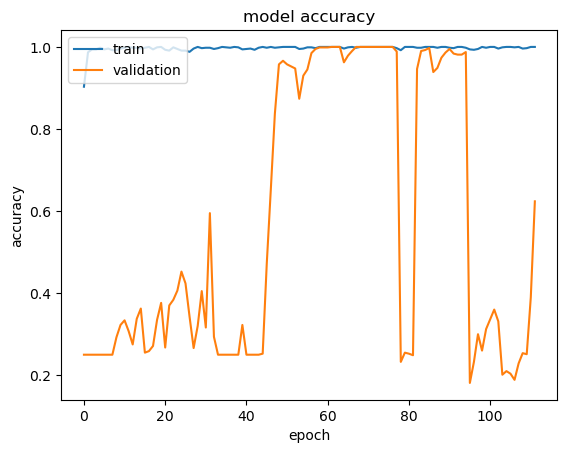

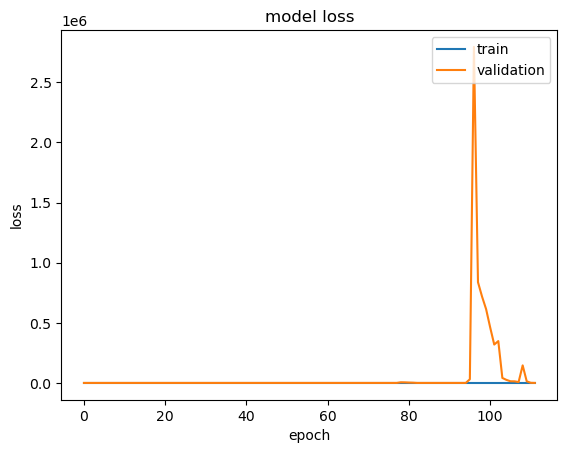

INFO:tensorflow:Assets written to: Trained_model\assets


INFO:tensorflow:Assets written to: Trained_model\assets


In [9]:
def plot_all(history):
    """
    The plot_all() function takes the history of the trained model
    and create two plots for accuracy and loss of both training and validation.
    The plots are saved as png files

    Args:
        history: The history to use and plot

    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig("plot_accuracy_mobile_large.png")
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig("plot_loss_mobile_large.png")
    plt.show()
    

plot_all(history)
# Save model weights
model.save("Trained_Mobile_Large_Model")

In [10]:
# Create test batches
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)

In [11]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [12]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

Confusion matrix, without normalization
[[150   0   0   0]
 [  0 150   0   0]
 [  0   0 150   0]
 [  1   0   0 149]]


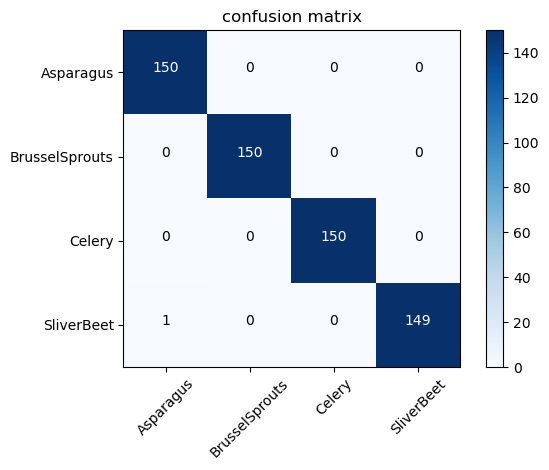

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.savefig("confusion_mobile_large.png")
    

cm_plot_labels = ['Asparagus', 'BrusselSprouts', 'Celery', 'SliverBeet']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')